In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("bank.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Question 1

In [3]:
dfo=df.select_dtypes("O")
dfo

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [4]:
ytemp=dfo["y"].replace({"no":0,"yes":1})
ytemp

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [5]:
dfo.describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


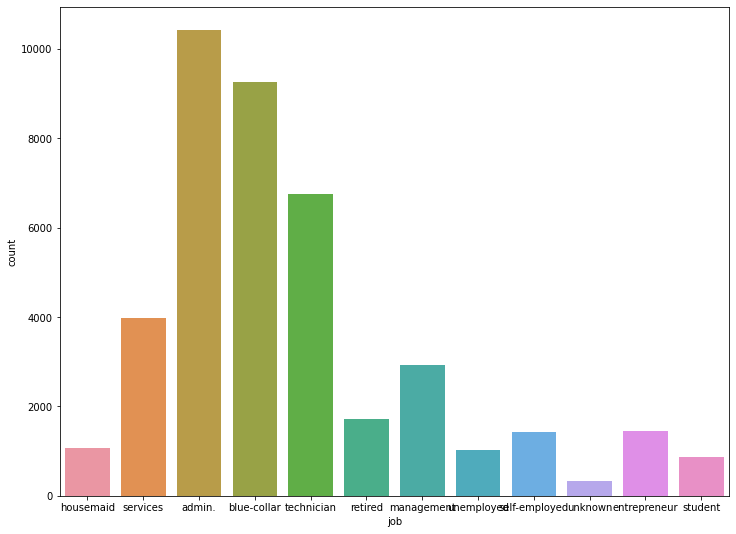

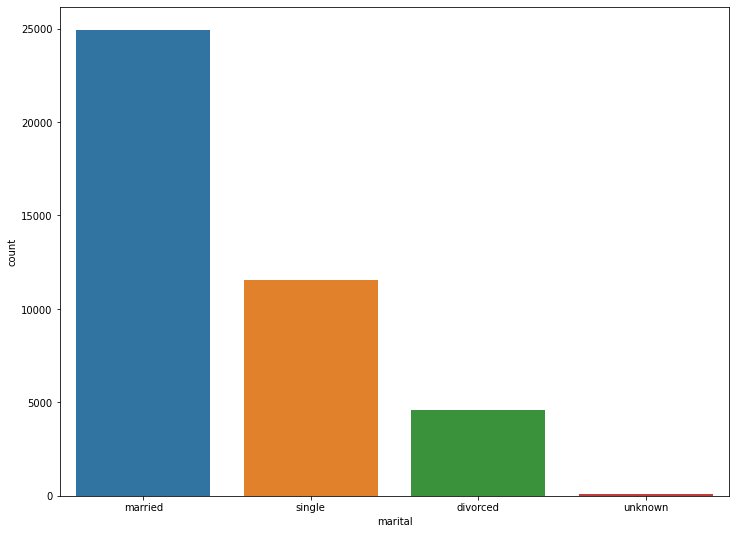

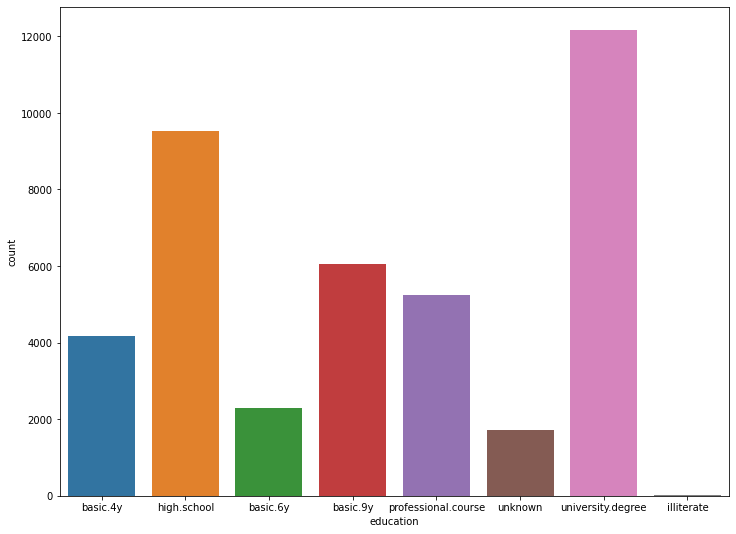

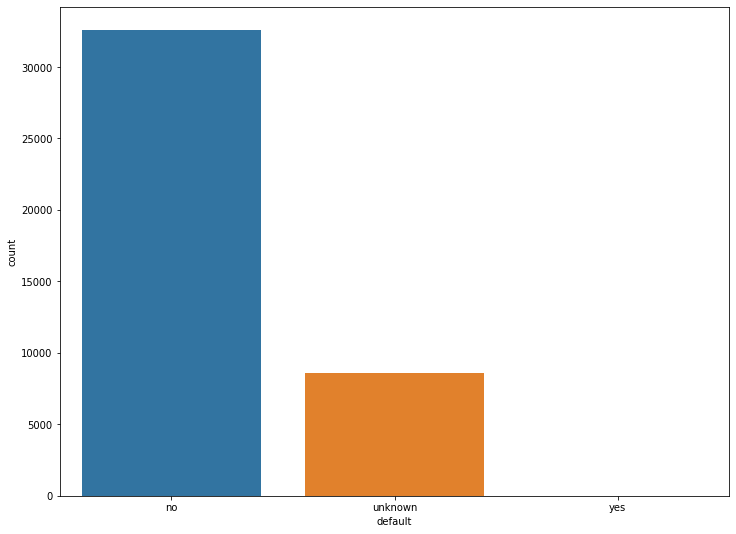

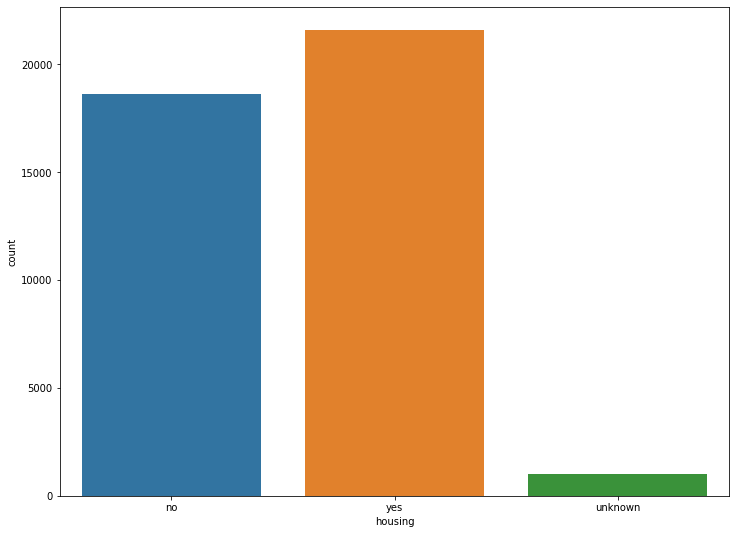

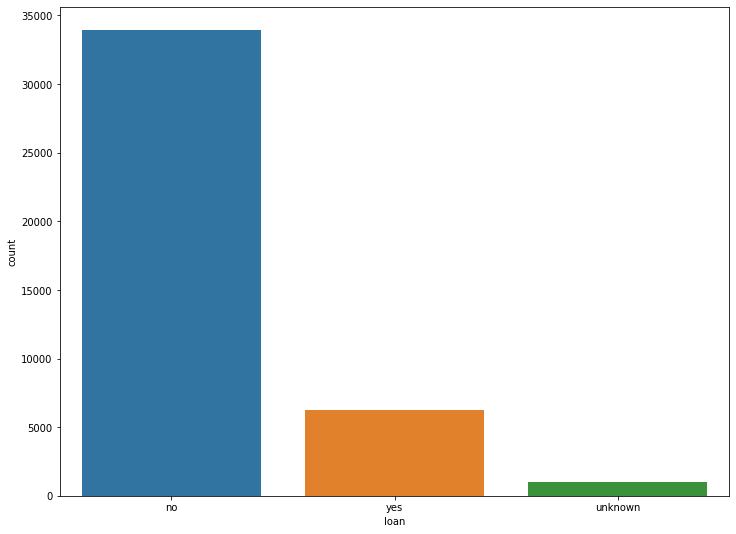

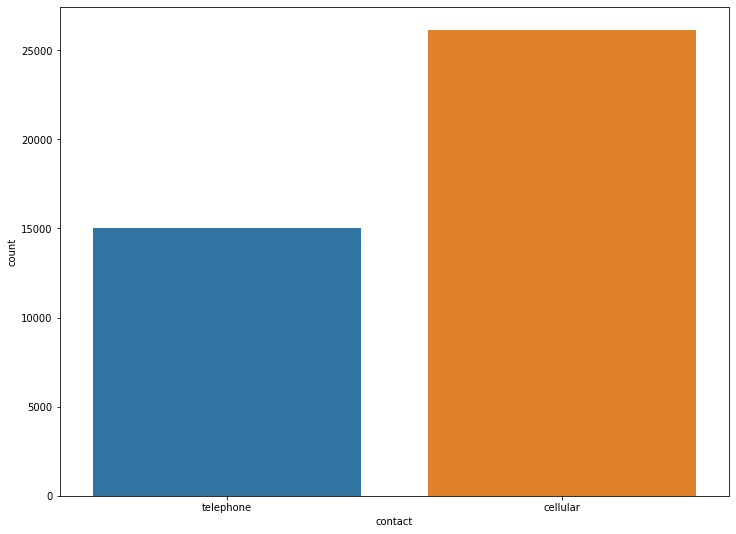

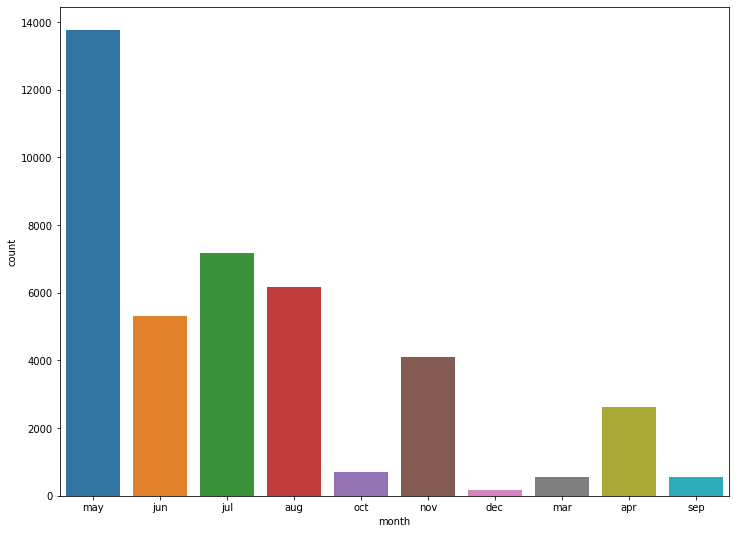

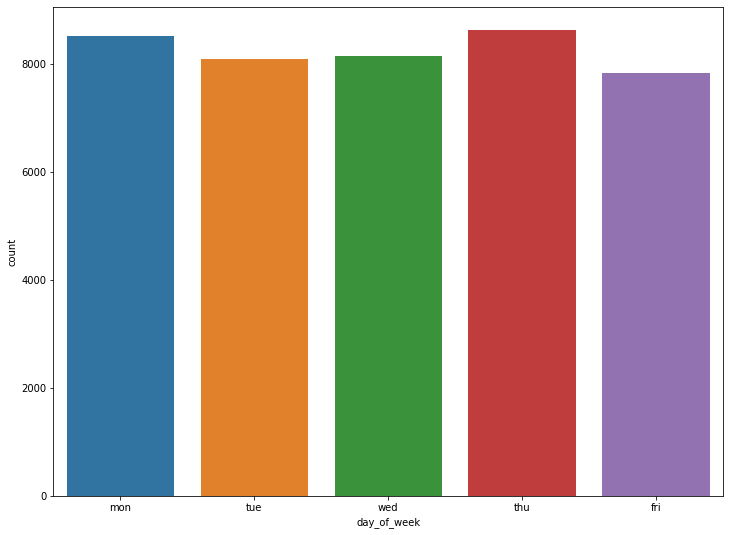

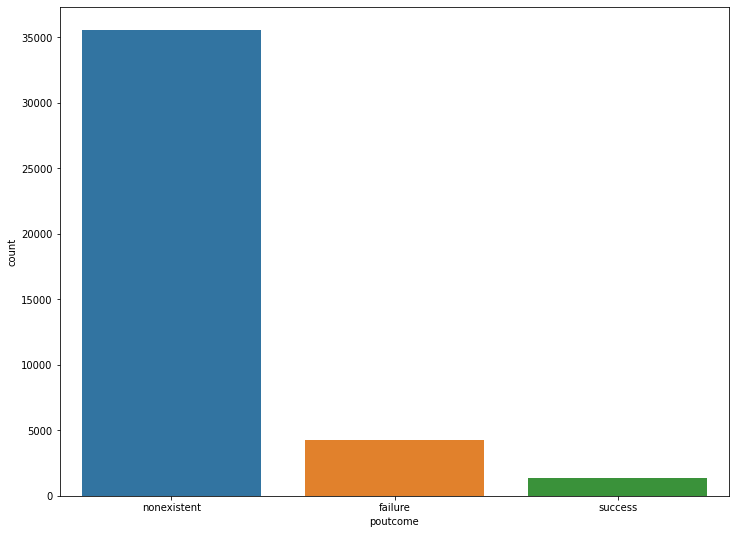

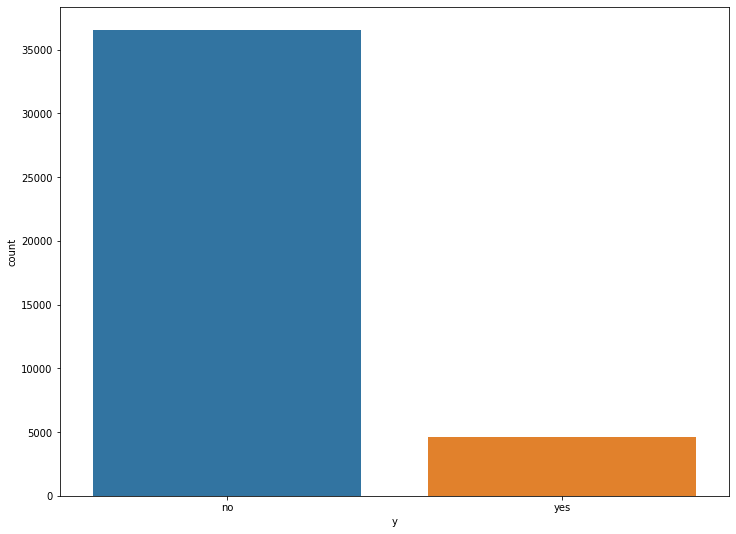

In [6]:
for i in dfo.columns:
    f, ax = plt.subplots(figsize=(12, 9))
    sns.countplot(data=dfo,x=i)

## Question 2

#### a). Missing Value

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

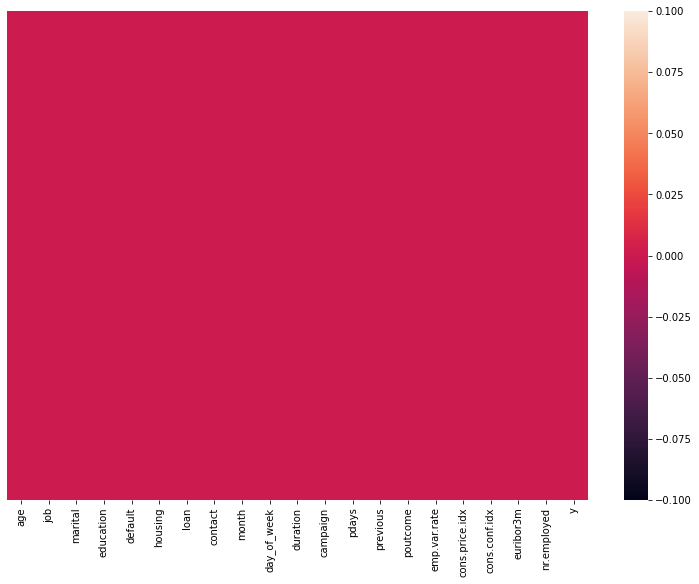

In [8]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.isnull(),yticklabels=False)

#### b). Label Encoder

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.copy()
for i in dfo.columns:
    df1[i]= label_encoder.fit_transform(df1[i])
df1.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
26914,30,0,2,6,0,0,2,0,7,2,...,3,999,0,1,-0.1,93.200,-42.0,4.076,5195.8,0
37948,40,0,0,3,0,2,0,1,9,0,...,1,999,0,1,-3.4,92.379,-29.8,0.803,5017.5,0
10156,35,9,0,5,0,2,0,1,4,2,...,2,999,0,1,1.4,94.465,-41.8,4.958,5228.1,0
29038,34,10,1,2,1,2,0,0,0,0,...,1,999,1,0,-1.8,93.075,-47.1,1.405,5099.1,0
35317,21,8,2,6,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.250,5099.1,0


<AxesSubplot:>

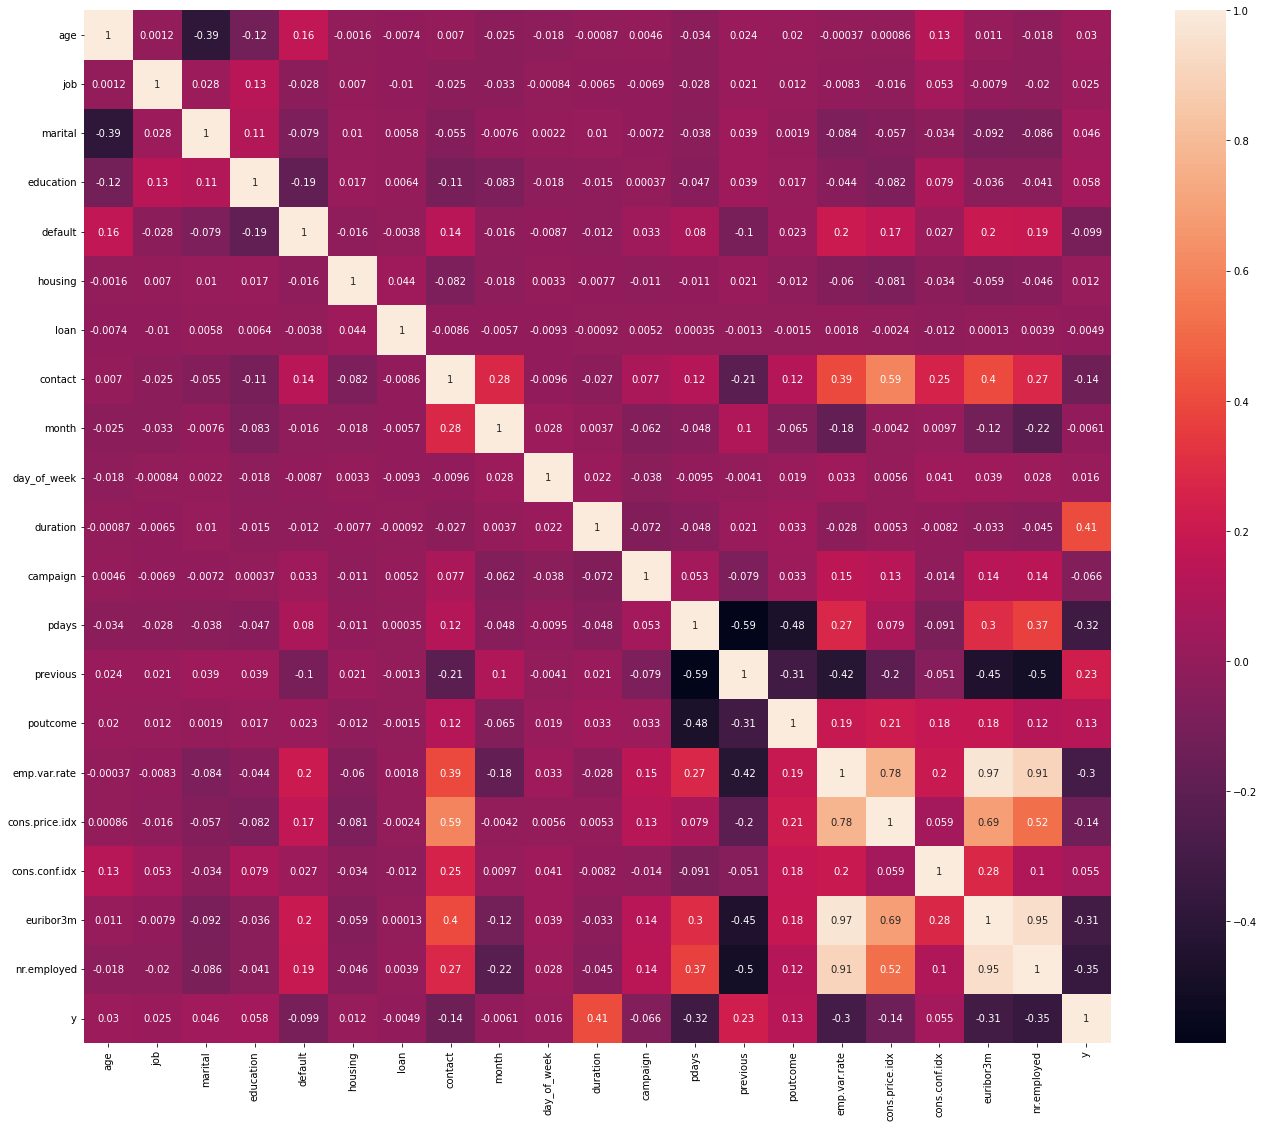

In [10]:
f, ax = plt.subplots(figsize=(23, 19))
sns.heatmap(df1.corr(),annot=True)

In [11]:
df1.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

#### c). Selecting important features based on Random Forest

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [13]:
features=df1.columns

In [14]:
X=df1.drop(["y"],axis=1)
y=ytemp

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [16]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10,)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [17]:
rf.score(X_train,y_train)

0.9440532759876522

In [18]:
rf.score(X_test,y_test)

0.9174556931294003

In [19]:
from sklearn.feature_selection import RFECV

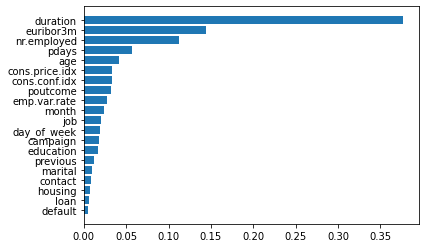

In [20]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [21]:
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=10, random_state=0))

In [22]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True])

In [23]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [24]:
print(selected_feat)

Index(['duration', 'pdays', 'euribor3m', 'nr.employed'], dtype='object')


#### d). Handling unbalanced data using SMOTE

In [25]:
target=[]
for i in selected_feat:
    target.append(i)
target.append("y")
target

['duration', 'pdays', 'euribor3m', 'nr.employed', 'y']

In [26]:
df2=df1.copy()[target]

In [27]:
df2 

,duration,pdays,euribor3m,nr.employed,y
0,261,999,4.857,5191.0,0
1,149,999,4.857,5191.0,0
2,226,999,4.857,5191.0,0
3,151,999,4.857,5191.0,0
4,307,999,4.857,5191.0,0
...,...,...,...,...,...
41183,334,999,1.028,4963.6,1
41184,383,999,1.028,4963.6,0
41185,189,999,1.028,4963.6,0
41186,442,999,1.028,4963.6,1


f:\classification\virtual2\tars\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

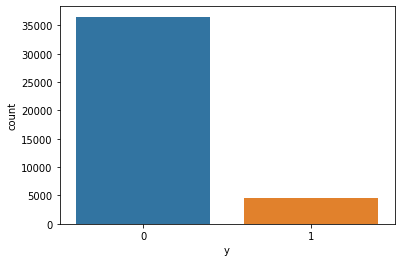

In [28]:
sns.countplot(df2.y)

In [29]:
X1=df2.drop(["y"],axis=1)
y1=df2.y

In [30]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.3)

In [31]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train1, y_train1.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3244
Before OverSampling, counts of label '0': 25587 

After OverSampling, the shape of train_X: (51162, 4)
After OverSampling, the shape of train_y: (51162,) 

After OverSampling, counts of label '1': 25581
After OverSampling, counts of label '0': 25581


#### e).  Standardize the data

In [32]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train_res= st_x.fit_transform(X_train_res)    
x_test= st_x.transform(X_test1)

## 3.  Build model

#### a).  Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train_res, y_train_res)
print("Train Score: ",classifier.score(x_train_res, y_train_res))
print("Test Score: ",classifier.score(x_test, y_test1))

Train Score:  0.8438684961494859
Test Score:  0.8470502549162418


#### b).  AdaBoost Classifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(x_train_res, y_train_res)
print("Train Score: ",Ada.score(x_train_res, y_train_res))
print("Test Score: ",Ada.score(x_test, y_test1))

Train Score:  0.8697861694226183
Test Score:  0.8672817026786437


#### c).  Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() 
nb.fit(x_train_res, y_train_res)
print(nb.score(x_train_res, y_train_res))
print(nb.score(x_test, y_test1))

0.7938509049685313
0.8825766771870195


#### d).  KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17,p=2)  
knn.fit(x_train_res, y_train_res)
print(knn.score(x_train_res, y_train_res))
print(knn.score(x_test, y_test1))

0.908174035416911
0.862668932588816


#### e).  SVM

In [38]:
from sklearn.svm import SVC 
svm = SVC(kernel="linear",C = 3,verbose=True) 
svm.fit(x_train_res, y_train_res)
print(svm.score(x_train_res, y_train_res))
print(svm.score(x_test, y_test1))

[LibSVM]0.8479340135256636
0.8416282269159181


## 4.  Performance metrics

#### a).  Logistic Regression

In [39]:
from sklearn import metrics
predictions=classifier.predict(x_test)
print(metrics.classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     10967
           1       0.41      0.83      0.55      1390

    accuracy                           0.85     12357
   macro avg       0.69      0.84      0.73     12357
weighted avg       0.91      0.85      0.87     12357



#### b).  AdaBoost

In [40]:
from sklearn import metrics
predictions=Ada.predict(x_test)
print(metrics.classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10967
           1       0.45      0.85      0.59      1390

    accuracy                           0.87     12357
   macro avg       0.72      0.86      0.76     12357
weighted avg       0.92      0.87      0.88     12357



#### c).  Naïve Bayes

In [41]:
from sklearn import metrics
predictions=nb.predict(x_test)
print(metrics.classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10967
           1       0.48      0.67      0.56      1390

    accuracy                           0.88     12357
   macro avg       0.72      0.79      0.75     12357
weighted avg       0.90      0.88      0.89     12357



#### d).  KNN

In [42]:
from sklearn import metrics
predictions=knn.predict(x_test)
print(metrics.classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10967
           1       0.44      0.87      0.59      1390

    accuracy                           0.86     12357
   macro avg       0.71      0.86      0.75     12357
weighted avg       0.92      0.86      0.88     12357



#### e).  SVM

In [43]:
from sklearn import metrics
predictions=svm.predict(x_test)
print(metrics.classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     10967
           1       0.40      0.85      0.55      1390

    accuracy                           0.84     12357
   macro avg       0.69      0.84      0.72     12357
weighted avg       0.91      0.84      0.86     12357



## Conclusion

KNN model is best suited for this problem statement as it provides the highest score